In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [150]:
col_names=['id','ccf','age','sex','painloc','painexer','relrest','pncaden','cp','trestbps','htn','chol','smoke','cigs','years','fbs','dm','famhist','restecg','ekgmo','ekgday','ekgyr','dig','prop','nitr','pro','diuretic','proto','thaldur','thaltime','met','thalach','thalrest','tpeakbps','tpeakbpd','dummy','trestbpd','exang','xhypo','oldpeak','slope','rldv5','rldv5e','ca','restckm','exerckm','restef','restwm','exeref','exerwm','thal','thalsev','thalpul','earlobe','cmo','cday','cyr','num','lmt','ladprox','laddist','diag','cxmain','ramus','om1','om2','rcaprox','rcadist','lvx1','lvx2','lvx3','lvx4','lvf','cathef','junk','name']
df = pd.read_csv('heart_data.csv', header=None, names=col_names)

In [151]:
df

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,294,0,39,0,-9,-9,-9,-9,3,138,...,1,1,1,1,1,1,2,-9,-9,name
278,295,0,57,1,-9,-9,-9,-9,2,154,...,1,1,1,1,1,1,1,-9,-9,name
279,296,0,58,0,-9,-9,-9,-9,4,130,...,1,1,1,1,1,1,1,-9,-9,name
280,297,0,57,1,-9,-9,-9,-9,4,110,...,1,2,1,1,1,1,1,-9,-9,name


In [152]:
df.dtypes

id          int64
ccf         int64
age         int64
sex         int64
painloc     int64
            ...  
lvx4        int64
lvf         int64
cathef      int64
junk        int64
name       object
Length: 76, dtype: object

In [153]:
graph_selection=['age','sex','cp','trestbps', 'htn','chol','cigs','years','fbs','famhist','restecg','ekgmo','ekgday','ekgyr','dig','nitr','pro','diuretic','proto','thaldur','thaltime','met','thalach','thalrest', 'tpeakbps', 'tpeakbpd', 'dummy','trestbpd', 'exang','xhypo','oldpeak','slope','rldv5e','ca','thal','cmo','cday','cyr','lmt', 'ladprox','laddist','cxmain','om1','rcaprox','rcadist','lvx3','lvx4','lvf']

In [154]:
X = df[graph_selection].values
Y = df['num'].values

In [155]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=-9, strategy='median')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [156]:
X = np.append(arr=np.ones((282, 1)).astype(int), values=X, axis=1)

In [157]:
X

array([[ 1., 63.,  1., ...,  1.,  1.,  1.],
       [ 1., 67.,  1., ...,  1.,  1.,  1.],
       [ 1., 67.,  1., ...,  1.,  7.,  3.],
       ...,
       [ 1., 58.,  0., ...,  1.,  1.,  1.],
       [ 1., 57.,  1., ...,  1.,  1.,  1.],
       [ 1., 47.,  1., ...,  1.,  1.,  1.]])

In [158]:
from statsmodels.regression.linear_model import OLS

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    print(regressor_OLS.summary())
    return x

In [159]:
SL = 0.01
X_opt = X
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     430.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          2.75e-155
Time:                        19:51:21   Log-Likelihood:                -72.774
No. Observations:                 282   AIC:                             165.5
Df Residuals:                     272   BIC:                             202.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1587      0.067    -47.470      0.0

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Modeled, Y, random_state=42, test_size=0.2)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
k_nn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1, algorithm='ball_tree', leaf_size=30)
k_nn_classifier.fit(X_train, Y_train)
k_nn_y_pred = k_nn_classifier.predict(X_test)                    #predicted y values for X_train\n",
from sklearn import metrics
k_nn_acc = metrics.accuracy_score(Y_test, k_nn_y_pred)
print('Accuracy: ', k_nn_acc)

Accuracy:  0.8771929824561403


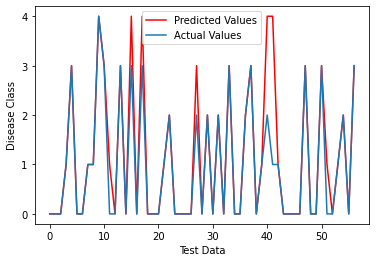

In [162]:
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(k_nn_classifier.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [163]:
from sklearn.tree import DecisionTreeClassifier;
dt = DecisionTreeClassifier(criterion='gini', splitter='best')
dt.fit(X_train, Y_train)
dt_y_pred = dt.predict(X_test)
dt_acc = metrics.accuracy_score(Y_test, dt_y_pred)
print('Accuracy', dt_acc)

Accuracy 0.9649122807017544


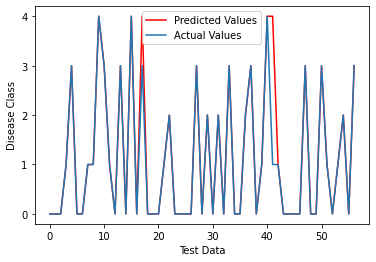

In [164]:
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(dt.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [165]:
from sklearn.ensemble import RandomForestClassifier;
rf = RandomForestClassifier(n_estimators=10, criterion='gini')
rf.fit(X_train, Y_train)
rf_y_pred = rf.predict(X_test)
rf_acc = metrics.accuracy_score(Y_test, rf_y_pred)
print('Accuracy: ', rf_acc)

Accuracy:  0.8947368421052632


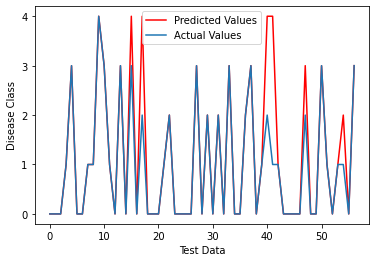

In [166]:
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(rf.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [167]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(Y_test, logreg_pred)
print("Logistic Regression accuracy:", logreg_acc)

Logistic Regression accuracy: 0.8245614035087719


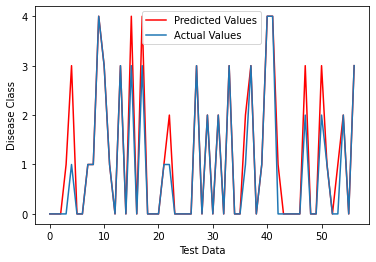

In [168]:
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(logreg.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [169]:
# Support Vector Machines
svm = SVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.6491228070175439


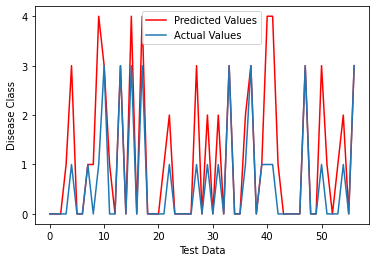

In [170]:
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(svm.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [171]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(Y_test, gb_pred)
print("Gradient Boosting accuracy:", gb_acc)

Gradient Boosting accuracy: 0.9824561403508771


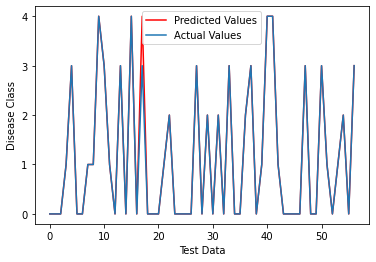

In [172]:
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(gb.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()

In [173]:
# Neural Networks
nn = MLPClassifier()
nn.fit(X_train, Y_train)
nn_pred = nn.predict(X_test)
nn_acc = accuracy_score(Y_test, nn_pred)
print("Neural Network accuracy:", nn_acc)

Neural Network accuracy: 0.6666666666666666


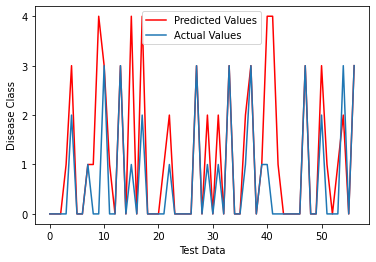

In [174]:
objects = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
plt.ylabel('Disease Class')
plt.xlabel('Test Data')
plt.plot(Y_test, color='red', label='Predicted Values')
plt.plot(nn.predict(X_test), label='Actual Values')
plt.yticks(y_pos, objects)
plt.legend()
plt.show()